# Link Prediction

The dataset is subsample of hike link prediction challenge. 

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("dataset.csv")

In [3]:
data.head()

,node1_id,node2_id,is_chat
0,8446602,6636127,0
1,1430102,7433949,0
2,2803017,8372333,0
3,4529348,894645,0
4,5096572,4211638,0


In [4]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [5]:
# user feature contains features for the nodes
user_features=reduce_mem_usage(pd.read_csv('user_features.csv'))

Memory usage after optimization is: 133.98 MB
Decreased by 84.8%


In [6]:
# seperating the features of node1 and node2
train_1=pd.merge(data, user_features, how='left', left_on='node1_id', right_on='node_id')


In [7]:
# merging the node2 features with node1
train_2=pd.merge(train_1, user_features, how='left', left_on='node2_id', right_on='node_id')

In [8]:
train_2.columns

Index(['node1_id', 'node2_id', 'is_chat', 'node_id_x', 'f1_x', 'f2_x', 'f3_x',
       'f4_x', 'f5_x', 'f6_x', 'f7_x', 'f8_x', 'f9_x', 'f10_x', 'f11_x',
       'f12_x', 'f13_x', 'node_id_y', 'f1_y', 'f2_y', 'f3_y', 'f4_y', 'f5_y',
       'f6_y', 'f7_y', 'f8_y', 'f9_y', 'f10_y', 'f11_y', 'f12_y', 'f13_y'],
      dtype='object')

In [9]:
train_2.head()

,node1_id,node2_id,is_chat,node_id_x,f1_x,f2_x,f3_x,f4_x,f5_x,f6_x,...,f4_y,f5_y,f6_y,f7_y,f8_y,f9_y,f10_y,f11_y,f12_y,f13_y
0,8446602,6636127,0,8446602,22,0,0,24,0,0,...,15,11,5,19,12,5,16,10,4,10
1,1430102,7433949,0,1430102,0,0,0,0,0,0,...,16,13,6,20,16,7,25,21,6,15
2,2803017,8372333,0,2803017,9,2,0,14,7,1,...,1,1,0,1,1,0,0,0,0,8
3,4529348,894645,0,4529348,11,11,10,11,10,9,...,1,1,1,1,1,1,1,1,1,15
4,5096572,4211638,0,5096572,31,31,31,31,31,31,...,7,1,0,9,1,0,16,1,0,7


In [10]:
train_2.shape

(169873, 31)

In [11]:
df = train_2.drop(['node_id_x','node_id_y'],axis=1)

In [12]:
df.columns

Index(['node1_id', 'node2_id', 'is_chat', 'f1_x', 'f2_x', 'f3_x', 'f4_x',
       'f5_x', 'f6_x', 'f7_x', 'f8_x', 'f9_x', 'f10_x', 'f11_x', 'f12_x',
       'f13_x', 'f1_y', 'f2_y', 'f3_y', 'f4_y', 'f5_y', 'f6_y', 'f7_y', 'f8_y',
       'f9_y', 'f10_y', 'f11_y', 'f12_y', 'f13_y'],
      dtype='object')

In [13]:
df.describe()

,node1_id,node2_id,is_chat,f1_x,f2_x,f3_x,f4_x,f5_x,f6_x,f7_x,...,f4_y,f5_y,f6_y,f7_y,f8_y,f9_y,f10_y,f11_y,f12_y,f13_y
count,1.698730e+05,1.698730e+05,169873.000000,169873.000000,169873.000000,169873.000000,169873.000000,169873.000000,169873.000000,169873.000000,...,169873.000000,169873.000000,169873.000000,169873.000000,169873.000000,169873.000000,169873.000000,169873.000000,169873.000000,169873.000000
mean,4.313621e+06,4.369832e+06,0.025119,19.134436,9.026102,4.591983,19.284018,9.257581,4.747158,19.386571,...,18.396243,8.867489,4.490655,18.519777,9.028633,4.537460,18.656596,9.170845,4.574064,11.344528
std,2.546109e+06,2.548384e+06,0.156486,13.611182,10.512180,9.039408,13.514690,10.532458,9.071613,13.444646,...,13.738709,10.461747,8.871669,13.667853,10.501237,8.904743,13.590404,10.535492,8.938355,3.941819
min,2.000000e+01,2.200000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.126716e+06,2.179073e+06,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,7.000000
50%,4.440824e+06,4.445398e+06,0.000000,29.000000,4.000000,0.000000,29.000000,5.000000,0.000000,29.000000,...,27.000000,4.000000,0.000000,27.000000,4.000000,0.000000,27.000000,4.000000,0.000000,15.000000
75%,6.548247e+06,6.611939e+06,0.000000,31.000000,15.000000,3.000000,31.000000,16.000000,4.000000,31.000000,...,31.000000,15.000000,3.000000,31.000000,15.000000,3.000000,31.000000,16.000000,3.000000,15.000000
max,8.556069e+06,8.873579e+06,1.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,...,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,15.000000


In [19]:
import seaborn as sns

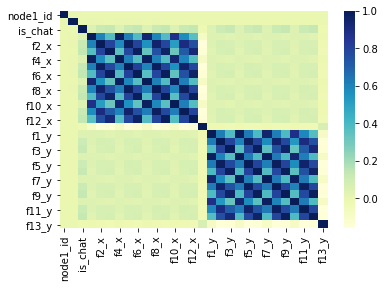

In [21]:
sns.heatmap(df.corr(), cmap="YlGnBu")

We can see that all most of the columns are crrelated. Dropping unnecessary columns.

In [45]:
# seperating the columns
X = df[['f1_x','f2_x','f3_x','f13_x','f1_y','f2_y','f3_y','f13_y']]

In [46]:
# target variable
y = df['is_chat']

In [47]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.model_selection import train_test_split

In [48]:
# splitting the dataset into train and test.
X_train,X_test,y_train, y_test = train_test_split(X, y ,test_size = .3,shuffle = True)

In [49]:
df1 = X_train

In [50]:
df2 = X_test

In [44]:
# using gradient boosting classifier .
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)
accuracy_score(y_test,y_pred)

0.9740787253247518

In [64]:
# defining a grapg for training cases
G = nx.Graph()

In [65]:
df1['is_chat'] = y_train 

/home/dhiraj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [66]:
# adding nodes to the graph
G.add_nodes_from(df1['node1_id'])

In [67]:
# linking the nodes where is_chat is 1.
link = df1[df1['is_chat']==1]

In [68]:
link.head()

,node1_id,node2_id,f1_x,f2_x,f3_x,f13_x,f1_y,f2_y,f3_y,f13_y,is_chat
166072,3346105,8194189,31,31,31,15,21,21,20,15,1
166905,4102555,4808610,31,31,19,7,16,14,7,8,1
165736,8523276,4345274,31,14,3,15,31,6,3,15,1
167141,2090923,3584586,31,2,0,11,31,28,6,11,1
169275,3702930,8363796,31,22,2,8,18,18,18,6,1


In [69]:
# making a tuple of the nodes to pass in the graph.
new_df = list(map(lambda x, y:(x,y), link['node1_id'], link['node2_id']))

In [70]:
G.add_edges_from(new_df)

In [71]:
# information about graph.
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 118044
Number of edges: 2986
Average degree:   0.0506


In [73]:
print(G.number_of_selfloops())

2


Other parameters can also be calculated with the help of networkx library.